In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [4]:
df = pd.read_csv("house_data.csv")   
df.head()


,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         300 non-null    int64  
 1   Bedrooms      300 non-null    int64  
 2   Bathrooms     300 non-null    float64
 3   SquareFeet    300 non-null    int64  
 4   YearBuilt     300 non-null    int64  
 5   GarageSpaces  300 non-null    int64  
 6   LotSize       300 non-null    float64
 7   ZipCode       300 non-null    int64  
 8   CrimeRate     300 non-null    float64
 9   SchoolRating  300 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.6 KB


In [6]:
df.drop("ZipCode", axis=1, inplace=True)


In [7]:
X = df.drop("Price", axis=1)
y = df["Price"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [11]:
lr_pred = lr.predict(X_test_scaled)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2:", r2_score(y_test, lr_pred))


Linear Regression Results
MAE: 230656.45060989022
RMSE: 262351.83591749036
R2: -0.09983946512828612


In [12]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [13]:
rf_pred = rf.predict(X_test)

print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2:", r2_score(y_test, rf_pred))


Random Forest Results
MAE: 226879.36183333336
RMSE: 259297.03478484292
R2: -0.07437571884854077


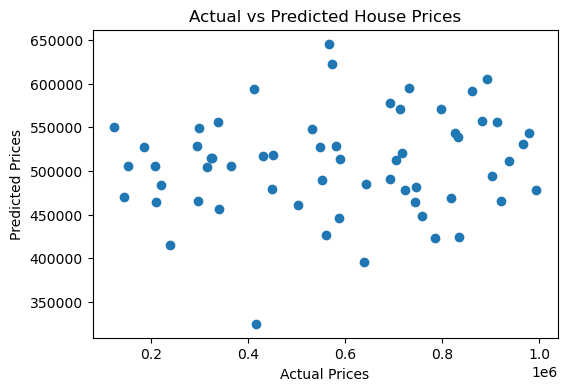

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [15]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


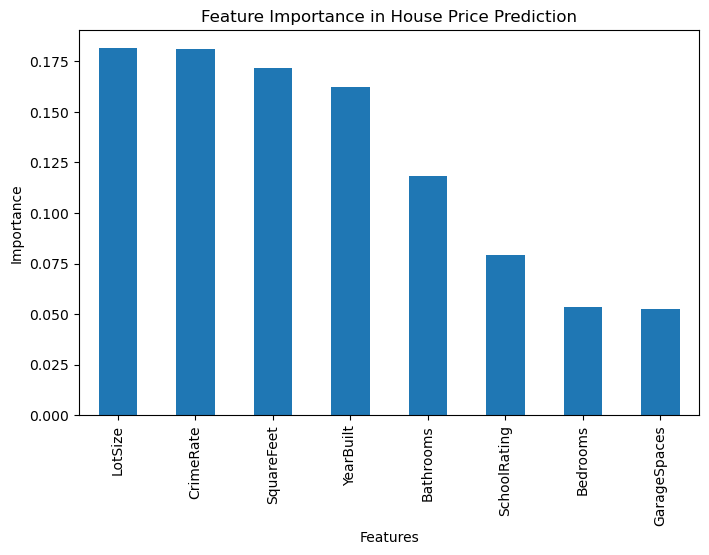

In [16]:
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in House Price Prediction")
plt.show()


In [ ]:
### Conclusion
Linear Regression was used as a baseline model but showed poor performance due to 
non-linear relationships in the data. Random Forest Regressor significantly improved 
prediction accuracy by capturing complex feature interactions.